# Generate Start Data

In the absense of having data on hand I will have to generate a bunch of fake data.

In [1]:
import numpy as np
import matplotlib

matplotlib.use('Agg')

import matplotlib.pyplot as plt
import uuid
from control.matlab import *
import os

In [2]:
# Assume engine is a 1st order transfer function with 1s time constant & unity gain.
# "A horse is a sphere if it makes the equations easier"
sys1 = tf([1],[1,1])

In [3]:
# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)

In [4]:
def gen_start(T):
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    if crank_duration>12:
        U[(T>crank_time+crank_duration)]=0
        start_type = "no"
    else:
        U[(T>crank_time+crank_duration)]=idle_speed
        start_type = "good"
    
    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 5, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout, start_type

In [5]:
# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)

In [9]:
fig = plt.figure(figsize=(1,1), dpi=100)

yout, start_type = gen_start(T)
fig.clf()
plt.plot(T,yout)
plt.axis('off')

base_dir = os.path.join("Images", start_type)
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

U = "test" # uuid.uuid4()
img_name = str(U)+".jpg"
img_path = os.path.join(img_name)
plt.savefig(img_path)
plt.close(plt.gcf())

In [7]:
from PIL import Image

In [29]:
dpi = 32
fig = plt.figure(figsize=(1,1), dpi=dpi)

yout, start_type = gen_start(T)
fig.clf()
plt.plot(T,yout)
plt.axis('off')

img_path = "test.png"
plt.savefig(img_path,
            dpi='figure',
            pad_inches=0.0)
plt.close(plt.gcf())
np.asarray(Image.open(img_path)).shape

(32, 32, 4)

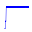

In [30]:
Image.open(img_path)